# Data Understanding

### Context

Sebuah perusahaan bernama Northwind bergerak dibidang export - import makanan di seluruh dunia. Dari database Northwind tersebut perusahaan ingin mendapatkan insight yang dapat dijalankan dari segmentasi Employees sehingga mereka dapat mengetahui gambaran umum tentang data sales .

### Database Information

- Sumber Database:
    https://www.mysqltutorial.org/wp-content/uploads/2018/03/mysqlsampledatabase.zip
    
- Database yang dimiliki mempunyai 8 tabel, yaitu:
    - Customers     : Menyimpan informasi tentang data pelanggan/customer.
    - Products      : Menyimpan informasi tentang jenis produk/kendaraan.
    - ProductLines  : Menyimpan informasi tentang kategori jenis produk/kendaraan beserta detail informasinya.
    - Orders        : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
    - OrderDetails  : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
    - Payments      : Menyimpan informasi pembayaran yang dilakukan oleh pelanggan berdasarkan akun yang digunakan.
    - Employees     : Menyimpan semua informasi karyawan serta struktur organisasi, seperti siapa melapor kepada siapa.
    - Offices       : Menyimpan data kantor penjualan.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

Fokus analisis disini mengenai Gambaran Umum Sales sehingga tabel utama yang digunakan adalah tabel Employees

# DATABASE
## Connecting to Database

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Zeroonetwothree10',
    database = 'northwind'
)

In [3]:
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

In [4]:
employees = sql_table (
    '''
    select * from employees;
    '''
)
employees

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2254.49
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,1861.08
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,None,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,1744.21
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,None,EC2 7JR,UK,(71) 555-7773,428,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,2004.07
6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,None,RG1 9SP,UK,(71) 555-5598,465,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp,1991.55
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp,2100.50
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,None,WG2 7LT,UK,(71) 555-4444,452,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp,2333.33


In [5]:
employees.to_csv('employess.csv')
df = pd.read_csv('employess.csv')
df

,Unnamed: 0,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary
0,0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55
1,1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2254.49
2,2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15
3,3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,1861.08
4,4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,1744.21
5,5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,2004.07
6,6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp,1991.55
7,7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp,2100.50
8,8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp,2333.33


## Missing Value

In [6]:
df.isna().sum()

Unnamed: 0         0
EmployeeID         0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             4
PostalCode         0
Country            0
HomePhone          0
Extension          0
Notes              0
ReportsTo          1
PhotoPath          0
Salary             0
dtype: int64

## HANDLING ANOMALIES

## 1

In [7]:
df.drop("Region", axis = 1)
# Menghapus Kolom Region

,Unnamed: 0,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary
0,0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55
1,1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2254.49
2,2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15
3,3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,1861.08
4,4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,1744.21
5,5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,EC2 7JR,UK,(71) 555-7773,428,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,2004.07
6,6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,RG1 9SP,UK,(71) 555-5598,465,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp,1991.55
7,7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,98105,USA,(206) 555-1189,2344,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp,2100.50
8,8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp,2333.33


## INSIGHT
Alasan Menghapus Kolom Region adalah karena adanya missing value dan fungsi kolom region sudah dapat digantikan atau dihandle oleh kolom Country

## CEK OUTLIERS

In [8]:
def cek_outliers(tabel,col):
    Q1 = tabel[col].describe()['25%']
    Q3 = tabel[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [9]:
cek_outliers(df,'Salary')

,Unnamed: 0,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary
0,0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55
2,2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15


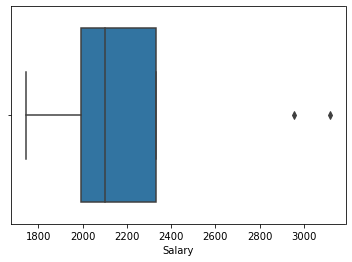

In [10]:
sns.boxplot(df['Salary'])
plt.show()

##  INSIGHT
Terdapat Outliers pada kolom salary

## 2

In [11]:
df.head()

,Unnamed: 0,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary
0,0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55
1,1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2254.49
2,2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15
3,3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,1861.08
4,4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,1744.21


In [12]:
df['FullName'] = df['FirstName'] + " " + df['LastName']

In [13]:
df
## Menambahkan Kolom Nama

,Unnamed: 0,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath,Salary,FullName
0,0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,2954.55,Nancy Davolio
1,1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2254.49,Andrew Fuller
2,2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp,3119.15,Janet Leverling
3,3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp,1861.08,Margaret Peacock
4,4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp,1744.21,Steven Buchanan
5,5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp,2004.07,Michael Suyama
6,6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp,1991.55,Robert King
7,7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp,2100.50,Laura Callahan
8,8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp,2333.33,Anne Dodsworth


## Insight
Menambahkan kolom nama digunakan untuk menampilkan nama lengkap pada tabel gaji employee pada nomor 3

## 3

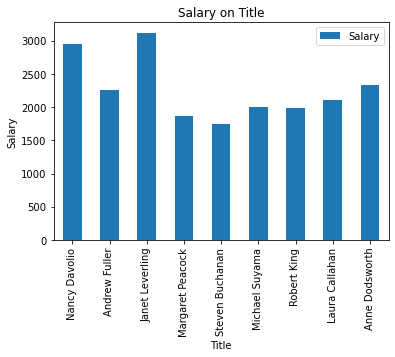

In [14]:
df.plot.bar(x='FullName' , y = 'Salary') 
plt.xlabel('Title')
plt.ylabel('Salary')
plt.title("Salary on Title")
plt.show()
# Menampilkan Tabel Gaji Employee

## INSIGHT
Kita dapat mengetahui gaji employee pada gambar grafik yang ditampilkan

## 4

In [15]:
pd.crosstab(index =[df['Title'],df['Salary']], columns = 'Value Salary').sort_values(['Salary'], ascending=[False])
# Gaji Tertinggi dan Terendah Employee

col_0                             Value Salary
Title                    Salary               
Sales Representative     3119.15             1
                         2954.55             1
                         2333.33             1
Vice President, Sales    2254.49             1
Inside Sales Coordinator 2100.50             1
Sales Representative     2004.07             1
                         1991.55             1
                         1861.08             1
Sales Manager            1744.21             1

## INSIGHT
Gaji tertingi salary didapatkan oleh Sales dengan jabatan atau TITLE Sales Representative dengan Salary 3119.15 dan Terendah didpatkan oleh sales dengan jabatan atau TITLE Sales Manager dengan Salary 1744.21 

## 5

In [16]:
pd.crosstab(index =[df['Title'],df['Country']], columns ='Value Country')

col_0                             Value Country
Title                    Country               
Inside Sales Coordinator USA                  1
Sales Manager            UK                   1
Sales Representative     UK                   3
                         USA                  3
Vice President, Sales    USA                  1

In [17]:
df['Country'].mode() 
# Menampilkan negara asal yang sering muncul para employee beserta Grafik

0    USA
dtype: object

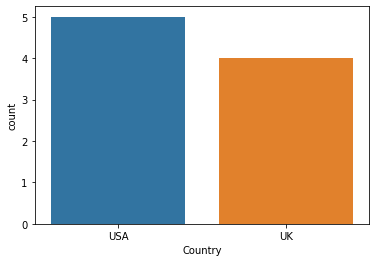

In [18]:
sns.countplot(df['Country'])
plt.show()

## INSIGHT
Dari keterangan tabel diatas kita dapat mengetahui negara asal yang sering muncul pada employee adalah USA

## 6

In [19]:
salary = pd.crosstab(index =[df['Title'],df['Salary']], columns ='Value Salary')
salary

col_0                             Value Salary
Title                    Salary               
Inside Sales Coordinator 2100.50             1
Sales Manager            1744.21             1
Sales Representative     1861.08             1
                         1991.55             1
                         2004.07             1
                         2333.33             1
                         2954.55             1
                         3119.15             1
Vice President, Sales    2254.49             1

In [20]:
df['Salary'].mean()
# Rata - rata gaji employee

2262.547777777778

## INSIGHT
Dengan menggunakan syntax mean pada kolom Salary maka kita dapat egetahui rata-rata gaji yang didapatkan oleh employee. Rata-rata gaji employee adalah 2262.54

## 7

In [21]:
from scipy.stats import normaltest #de Agustino

In [22]:
st, pval = normaltest(df['Salary'])
if pval >= 0.05:
    print(pval)
    print("Asumsi: Distribusi Normal")
else:
    print("Asumsi: Distribusi Tidak Normal")

0.32175348943339915
Asumsi: Distribusi Normal


## INSIGHT
Dengan menggunakan Pendistribusian dengan de Agustino maka dapat diketahui bahwa nilai pada kolom salary terdistribusi normal

## 8

<AxesSubplot:>

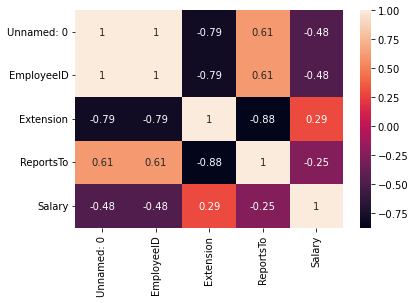

In [23]:
sns.heatmap(df.corr(), annot=True) #Korelasi Numerik

## INSIGHT
Grafik diatas merupakan korelasi numerik antara setiap Kolom

## 9

In [32]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    df[df['Country'] == 'UK']['Salary'],
    df[df['Country'] == 'USA']['Salary']
) 

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Salary Antara employee di country UK dan employee di country USA')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Salary Antara employee di country UK dan employee di country USA')

Gagal Tolak H0 Karena P-Value (0.2857142857142857 > 5%)
Tidak Terdapat Perbedaan Nilai Median Salary Antara employee di country UK dan employee di country USA


## INSIGHT
Tidak Terdapat Perbedaan Nilai Median Salary Antara employee di country UK dan employee di country USA